In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# def train_model(data, test_size=0.2, hyperparameters={}):
#     """
#     Train a machine learning model.

#     Parameters:
#     - model: The machine learning model to be trained.
#     - data: A tuple or list containing features and labels.
#     - test_size: The proportion of the dataset to include in the test split.
#     - hyperparameters: Hyperparameters for the model (as a dictionary).

#     Returns:
#     - trained_model: The trained machine learning model.
#     - test_predictions: The predictions on the test set.
#     - test_labels: The actual labels of the test set.
#     - test_accuracy: The accuracy of the model on the test set.
#     """
#     # Split the data into training and testing sets
#     features, labels = data
#     X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42, shuffle=False)

#     model = XGBRegressor(**hyperparameters)
#     model.fit(X_train, y_train)
#     # # Hyperparameter tuning using GridSearchCV
#     # if hyperparameters:
#     #     grid_search = GridSearchCV(model, hyperparameters, cv=5)
#     #     grid_search.fit(X_train, y_train)
#     #     model = grid_search.best_estimator_
#     # else:
#     #     # Train the model with default hyperparameters
#     #     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     test_predictions = model.predict(X_test)

#     # Evaluate the model on the test set
#     mse = mean_squared_error(y_test, test_predictions)
#     mae = mean_absolute_error(y_test, test_predictions)
#     r2  = r2_score(y_test, test_predictions)

#     return mse, mae, r2, test_predictions

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

def train_model(data, test_size=0.2, hyperparameters={}):
    # Split the data into training and testing sets
    features, labels = data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42, shuffle=True)


    # Initialize and fit the model
    xgb = XGBRegressor(**hyperparameters)
    model = BaggingRegressor(
            estimator=xgb,
            n_jobs=6, n_estimators=15, verbose=2, random_state=6601
            ).fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = model.predict(X_test)

    # Evaluate the model on the test set
    mse = mean_squared_error(y_test, test_predictions)
    rmse = mean_squared_error(y_test, test_predictions, squared=False)
    mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    return model, mse,rmse, mae, r2, test_predictions, X_train

In [2]:
import warnings

# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# features =  dataframe.drop(columns=['t_obs','lokasi', 'Date', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.','lcloud...',	'mcloud...', 'hcloud...', 'clmix.kg.kg.', 'wamix.kg.kg.', 'ws950.m.s.', 'ws800.m.s.', 'wd950.deg.', 'ws800.m.s.', 'wd800.deg.', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON']) 

In [8]:
import pandas as pd

dataframe = pd.read_csv('../../Data/data_fix_temp.txt')
columns_to_drop=[
    't_obs', 
    'lokasi',
    'Date', 
    'con_prec.mm.', 
    'mic_prec.mm.', 
    'sha_prec.mm.',
    'lcloud...',	
    'mcloud...', 
    'hcloud...', 
    'clmix.kg.kg.', 
    'wamix.kg.kg.', 
    'hari', 
    'UTC', 
    'LAT', 
    'LON',
    ]

features =  dataframe.drop(columns=columns_to_drop) 
target = dataframe['t_obs']


feature_train = features[:int(features.shape[0] * 0.8)]
y_tr = target[:int(target.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
feature_val = features[int(features.shape[0] * 0.8):]
y_val = target[int(target.shape[0] * 0.8):]

data = (feature_train, y_tr)
test_size = 0.2
hyperparameters = {
    'verbosity': 2,
    'device' : 'cuda',
    'n_jobs': -1,
    'colsample_bytree': 0.7,
    'learning_rate': 0.09,
    'max_depth': 8,
    'min_child_weight': 2,
    'n_estimators': 50,
    'random_state': 6601,
    'reg_alpha': 0.5,
    'lambda' : 0.9,
    'num_parallel_tree' : 4,
}
model, mse,rmse, mae, r2, test_pred, train_data = train_model(data, test_size, hyperparameters)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   39.5s remaining:   39.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   50.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Mean Squared Error: 2.0902363482586304
Root Mean Squared Error: 1.445764969923753
Mean Absolute Error: 1.0967302853871344
R2 Score: 0.783122438673763



[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.6s finished


In [9]:
inp_nwp = pd.read_csv('../../Data/MONAS-input_nwp_compile.csv')
inp_nwp

,lokasi,Date,suhu2m(degC),dew2m(degC),rh2m(%),wspeed(m/s),wdir(deg),lcloud(%),mcloud(%),hcloud(%),...,ws800(m/s),wd800(deg),t500(degC),rh500(%),ws500(m/s),wd500(deg),prec_nwp,LAT,LON,ELEV
0,96001,2023-10-17 15:00:00,27.4007,23.6856,80.3053,4.25554,191.08600,0.374474,1.000000,0.855219,...,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,2.923480e-19,5.87655,95.33785,126
1,96001,2023-10-17 18:00:00,27.4089,23.0971,77.4673,3.20000,228.61600,0.262561,1.000000,0.872848,...,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,1.034630e-19,5.87655,95.33785,126
2,96001,2023-10-17 21:00:00,27.3820,23.8747,81.3127,6.43993,224.35900,0.431500,1.000000,0.849396,...,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,0.000000e+00,5.87655,95.33785,126
3,96001,2023-10-18 00:00:00,27.4679,23.7839,80.4639,6.91585,220.91600,0.317385,1.000000,0.524404,...,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,0.000000e+00,5.87655,95.33785,126
4,96001,2023-10-18 03:00:00,27.9673,23.2775,75.7992,6.28717,214.11300,0.252877,0.785813,0.610115,...,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,0.000000e+00,5.87655,95.33785,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,2023-10-20 00:00:00,26.8513,19.0878,62.5816,1.52901,146.67200,0.051358,0.210951,0.000000,...,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,0.000000e+00,-6.30253,106.75636,41
4148,99992,2023-10-20 03:00:00,32.5296,17.3364,40.4115,2.83196,76.91420,0.000000,0.227088,0.000000,...,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,0.000000e+00,-6.30253,106.75636,41
4149,99992,2023-10-20 06:00:00,33.2196,21.2222,49.5108,6.39935,10.12190,0.000000,0.495652,0.000000,...,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,3.250240e-03,-6.30253,106.75636,41
4150,99992,2023-10-20 09:00:00,31.2358,21.8844,57.6837,5.41735,1.79568,0.000000,0.589733,0.000000,...,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,1.239780e-05,-6.30253,106.75636,41


In [10]:
test = inp_nwp.drop(columns=['Date', 'LAT', 'LON', 'prec_nwp'])
test = test.rename(
    columns={
        'suhu2m(degC)' : 'suhu2m.degC.',
        'dew2m(degC)' : 'dew2m.degC.',
        'rh2m(%)' : 'rh2m...',
        'wspeed(m/s)' : 'wspeed.m.s.',
        'wdir(deg)' : 'wdir.deg.',
        'lcloud(%)' : 'lcloud...',
        'mcloud(%)' : 'mcloud...' ,
        'hcloud(%)' : 'hcloud...',
        'surpre(Pa)' : 'surpre.Pa.' ,
        'clmix(kg/kg)' : 'clmix.kg.kg.' ,
        'wamix(kg/kg)' : 'wamix.kg.kg.' ,
        'outlr(W/m2)' : 'outlr.W.m2.' ,
        'pblh(m)' : 'pblh.m.',
        'lifcl(m)' : 'lifcl.m.' ,
        'cape(j/kg)' : 'cape.j.kg.' ,
        'mdbz' : 'mdbz' ,
        't950(degC)' : 't950.degC.' ,
        'rh950(%)' : 'rh950...',
        'ws950(m/s)' : 'ws950.m.s.' ,
        'wd950(deg)' : 'wd950.deg.' ,
        't800(degC)' : 't800.degC.' ,
        'rh800(%)' : 'rh800...' ,
        'ws800(m/s)' : 'ws800.m.s.',
        'wd800(deg)' : 'wd800.deg.' ,
        't500(degC)' : 't500.degC.' ,
        'rh500(%)' : 'rh500...' ,
        'ws500(m/s)' : 'ws500.m.s.' ,
        'wd500(deg)' : 'wd500.deg.',
})
#hcloud..., wamix.kg.kg., lcloud..., lokasi, clmix.kg.kg., mcloud...
test = test.drop(columns=['lcloud...','mcloud...', 'hcloud...', 'clmix.kg.kg.', 'wamix.kg.kg.',])
test


,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,surpre.Pa.,outlr.W.m2.,pblh.m.,lifcl.m.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
0,96001,27.4007,23.6856,80.3053,4.25554,191.08600,100903.0,180.376,526.076,616.078,...,191.4640,16.0404,73.3359,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,126
1,96001,27.4089,23.0971,77.4673,3.20000,228.61600,100735.0,196.935,491.829,689.544,...,217.4370,15.9013,73.9679,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,126
2,96001,27.3820,23.8747,81.3127,6.43993,224.35900,100655.0,232.870,558.189,618.759,...,222.8060,15.6937,73.0260,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,126
3,96001,27.4679,23.7839,80.4639,6.91585,220.91600,100769.0,233.885,532.027,644.846,...,220.2100,15.4617,74.9905,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,126
4,96001,27.9673,23.2775,75.7992,6.28717,214.11300,100950.0,268.016,700.017,786.830,...,212.3090,14.9336,76.5370,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,26.8513,19.0878,62.5816,1.52901,146.67200,100571.0,287.580,424.941,2139.000,...,100.6410,15.3491,71.3439,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,41
4148,99992,32.5296,17.3364,40.4115,2.83196,76.91420,100550.0,304.315,1399.820,1910.010,...,85.2487,15.5818,60.1363,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,41
4149,99992,33.2196,21.2222,49.5108,6.39935,10.12190,100316.0,301.166,1036.540,1510.300,...,15.0992,15.9853,67.9167,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,41
4150,99992,31.2358,21.8844,57.6837,5.41735,1.79568,100266.0,295.828,978.651,1278.150,...,16.7635,15.8179,74.5408,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,41


In [11]:
print(test.columns, len(test.columns))
print(train_data.columns, len(train_data.columns))

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'surpre.Pa.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV'],
      dtype='object') 25
Index(['suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'surpre.Pa.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV'],
      dtype='object') 24


In [12]:
inp_nwp[['suhu2m(degC)']]

,suhu2m(degC)
0,27.4007
1,27.4089
2,27.3820
3,27.4679
4,27.9673
...,...
4147,26.8513
4148,32.5296
4149,33.2196
4150,31.2358


In [13]:
pd.options.display.max_columns=50

In [14]:
train_data

,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,surpre.Pa.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
197302,24.7357,24.2861,97.4849,0.301561,224.6010,100888.0,172.553,206.204,429.300,2042.32000,13.5933,24.0034,82.5255,3.714930,245.9130,14.8470,88.5339,3.779630,274.0430,-6.06341,94.49970,6.49157,250.4560,3
357004,25.1011,19.5261,71.3403,0.530353,84.6457,99078.7,265.964,542.250,780.797,-0.10000,0.0000,21.6082,85.3935,0.348867,135.8350,13.8847,78.3836,5.560870,111.9040,-5.98380,93.43150,12.51580,91.9935,43
394078,28.3108,21.3481,66.0702,4.276410,197.6330,99671.5,272.917,739.370,1089.090,382.86500,0.0000,23.5306,83.6904,4.462900,198.0520,16.5266,75.1414,3.265940,70.8632,-3.87555,8.66118,3.63047,72.2388,92
195117,29.1468,23.6515,72.3894,2.898030,226.7140,100586.0,219.411,1125.660,800.840,1281.14000,0.0000,23.8079,87.7773,4.233960,222.4150,14.6565,93.3807,7.821640,238.8010,-4.89637,82.35080,10.30070,320.1630,3
311763,25.4535,22.6331,84.5414,1.010530,121.5440,97641.5,276.349,546.558,421.079,958.67800,0.0000,23.0121,89.9645,1.204900,118.1380,14.8935,85.0388,3.186990,62.6351,-4.87735,54.01190,4.53839,88.0422,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259179,28.1118,23.2621,75.0928,4.154830,334.5910,100491.0,175.764,533.707,746.799,1106.28000,0.0000,23.4821,81.2857,4.333750,330.3090,15.0957,88.5626,1.584140,204.4240,-5.27773,68.48890,3.30381,101.9190,6
365839,21.9531,21.1807,95.5451,2.094840,247.6000,100075.0,279.993,214.341,582.716,6.37387,0.0000,23.4399,75.1648,1.895420,72.9220,15.1789,58.9489,6.850770,127.0540,-4.74267,51.72050,3.52225,312.2180,2
131933,21.2204,18.8843,86.6881,2.216100,241.4450,100057.0,276.292,186.110,1185.260,-0.10000,0.0000,23.0349,73.7639,2.597980,148.9180,13.9205,83.2002,6.878050,57.6272,-4.86007,56.26510,6.75673,88.1868,85
146868,28.7339,23.7632,74.6433,2.481870,96.4801,98232.8,170.073,1010.230,813.297,2386.38000,0.0000,26.0895,78.8931,4.677700,96.3577,16.3558,72.9813,0.715423,198.6200,-4.70991,68.58430,6.45829,81.9872,3


In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming train_data is your original training data and train_data_scaled is the scaled version

# # Plot the distribution of the original data
# plt.figure(figsize=(12, 6))
# sns.distplot(train_data['dew2m.degC.'], label='Original Data', color='blue')

# # Plot the distribution of the scaled data
# sns.distplot(train_data_scaled['dew2m.degC.'], label='Scaled Data', color='orange')

# plt.title('Distribution Comparison between Original and Scaled Data')
# plt.xlabel('Feature Values')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [16]:
output_humid_ina_nwp = model.predict(test.drop(columns=['lokasi']))
output_humid_ina_nwp

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.3s finished


array([26.458124, 26.260138, 26.495571, ..., 33.180443, 32.150562,
       28.889095], dtype=float32)

In [17]:
y_val_pred = model.predict(feature_val)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished


In [18]:
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_val}')
print(f'Root Mean Squared Error: {rmse_val}')
print(f'Mean Absolute Error: {mae_val}')
print(f'R2 Score: {r2_val}\n')

Tanpa Scaling
Mean Squared Error: 3.0541816577367276
Root Mean Squared Error: 1.747621714713092
Mean Absolute Error: 1.3847336659775982
R2 Score: 0.7006725785976209



In [19]:
#OUTPUT

combined = pd.concat([dataframe[['Date', 'lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV']],y_val, pd.Series(y_val_pred, index = feature_val.index)], axis=1)
combined.columns = ['Date', 'lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV', 't_obs', 'prediction']
combined = combined.dropna()
combined.tail(15)

,Date,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,prediction
544260,2023-04-05 09:00:00,99992,29.1739,106.7564,-6.30253,41,35.4,30.358452
544261,2023-04-10 00:00:00,99992,24.9934,106.7564,-6.30253,41,25.6,25.203108
544262,2023-04-10 03:00:00,99992,30.2816,106.7564,-6.30253,41,26.4,30.383539
544263,2023-04-10 06:00:00,99992,31.1585,106.7564,-6.30253,41,30.6,31.243242
544264,2023-04-10 09:00:00,99992,30.3046,106.7564,-6.30253,41,31.4,30.952471
544265,2023-04-11 00:00:00,99992,24.3057,106.7564,-6.30253,41,26.5,25.068825
544266,2023-04-11 03:00:00,99992,30.3986,106.7564,-6.30253,41,32.0,30.811598
544267,2023-04-11 06:00:00,99992,31.1714,106.7564,-6.30253,41,33.2,31.687826
544268,2023-04-11 09:00:00,99992,30.2010,106.7564,-6.30253,41,29.8,31.121798
544269,2023-04-12 00:00:00,99992,25.1158,106.7564,-6.30253,41,25.8,25.206127


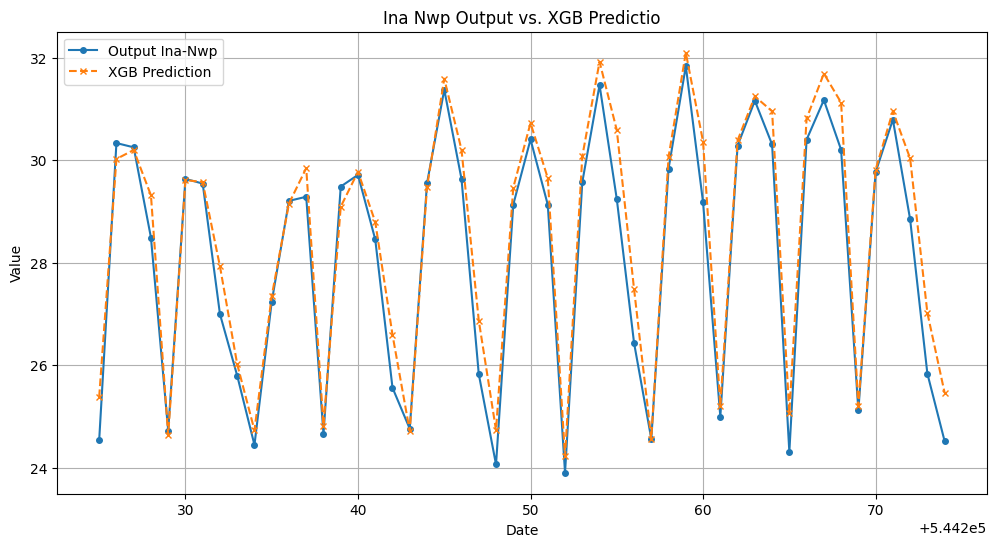

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(combined.iloc[-50:].index, combined.iloc[-50:]['suhu2m.degC.'], label='Output Ina-Nwp', marker='o', markersize=4)
plt.plot(combined.iloc[-50:].index, combined.iloc[-50:]['prediction'], label='XGB Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Ina Nwp Output vs. XGB Predictio')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [21]:
# model.save_model("Temp_xgb_tuned_RMSE_1_63.json")
import pickle
pickle.dump(model, open('Temp_xgb_tuned_RMSE_1_44.pkl', 'wb'))

###### 0.6875549881570844
###### 'verbosity': 2,
###### 'n_jobs': -1,
###### 'colsample_bytree': 0.7,
###### 'learning_rate': 0.09,
###### 'max_depth': 8,
###### 'min_child_weight': 2,
###### 'n_estimators': 50,
###### 'random_state': 6601,
###### 'reg_alpha': 0.5,
###### 'lambda' : 0.9,
###### 'tree_method' : 'exact',